
Importing Required Packages



In [2]:
import spacy


nlp = spacy.load("en_core_web_sm")


import pandas as pd


import csv


import re

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Import Datasets

In [4]:
import os

os.getcwd()

os.chdir("/content/drive/MyDrive/Colab_Data/GoEmotions")

os.listdir()

['goemotions_1.csv',
 'goemotions_3.csv',
 'goemotions_2.csv',
 'nrc.csv',
 'goemotionsfull.csv',
 'goemotionsfull.gsheet']

In [5]:
emotion_df = pd.read_csv("goemotionsfull.csv")

In [6]:
nrc_df = pd.read_csv('nrc.csv')

nrc_df

,Anger_NRC,Anticipation_NRC,Disgust_NRC,Fear_NRC,Joy_NRC,Negative_NRC,Positive_NRC,Sadness_NRC,Surprise_NRC,Trust_NRC
0,expletive,unfulfilled,smut,smut,tantalizing,smut,greeting,measles,greeting,proven
1,inept,tantalizing,measles,measles,felicity,expletive,tantalizing,inconsequential,unfulfilled,privy
2,unfulfilled,wait,inept,lynch,lovable,measles,inventor,unfulfilled,tantalizing,pawn
3,lynch,haste,perverted,militia,unbeaten,inept,felicity,lynch,trump,lovable
4,agitation,unbeaten,lynch,servile,superstar,perverted,civility,gray,unbeaten,merchant
...,...,...,...,...,...,...,...,...,...,...
3319,NaN,NaN,NaN,NaN,NaN,revive,NaN,NaN,NaN,NaN
3320,NaN,NaN,NaN,NaN,NaN,lace,NaN,NaN,NaN,NaN
3321,NaN,NaN,NaN,NaN,NaN,schism,NaN,NaN,NaN,NaN
3322,NaN,NaN,NaN,NaN,NaN,annoy,NaN,NaN,NaN,NaN


**Data Cleaning**

In [7]:
#send columns to list of lists

nrc_lists = nrc_df.values.T.tolist()

print(nrc_lists) #it's a list of lists

[['expletive', 'inept', 'unfulfilled', 'lynch', 'agitation', 'wrongdoing', 'satanic', 'militia', 'bellows', 'warden', 'complicate', 'opera', 'death', 'shoplifting', 'excitation', 'frenetic', 'unlawful', 'stifled', 'miserable', 'penalty', 'obliterated', 'reproach', 'grated', 'offender', 'devastation', 'wring', 'dissension', 'condemn', 'explode', 'thoughtless', 'sting', 'fleece', 'vengeful', 'segregate', 'subsidy', 'abomination', 'revolting', 'exaggerate', 'hellish', 'disrespect', 'delay', 'delinquent', 'crusade', 'disgusting', 'disobedient', 'duel', 'annihilate', 'antisocial', 'oppression', 'banger', 'grumpy', 'obliterate', 'inequality', 'dumps', 'tree', 'dismay', 'mortality', 'defy', 'disease', 'harassing', 'accused', 'bad', 'skirmish', 'gall', 'combatant', 'hot', 'horrible', 'frightful', 'unfair', 'tolerate', 'coercion', 'backbone', 'adversary', 'misconception', 'thump', 'criminal', 'devastating', 'berserk', 'blatant', 'corrupting', 'reversal', 'bastion', 'blast', 'patter', 'sickening

In [8]:
nrc_dict = {} #empty ditionary
for col_name, col_data in nrc_df.items(): #uses .items to iterate over columns
  # Keep the part before the underscore and lowercase it
  new_col_name = col_name.split('_')[0].lower() #splits column name on '_' and accesses first element and lowers it

  # Let's also remove nan values
  new_col_data = col_data.dropna()

  # put into dictionary
  nrc_dict[new_col_name] = new_col_data.tolist() #uses tolist to add columns and values to dictionary

print(nrc_dict["positive"][0:11]) #first 12 values for positive
print(nrc_dict["positive"][-11:]) #last 12

['greeting', 'tantalizing', 'inventor', 'felicity', 'civility', 'artistic', 'lovable', 'restful', 'unbeaten', 'superstar', 'tutelage']
['adaptable', 'community', 'success', 'salutary', 'quaint', 'revive', 'lace', 'truce', 'candidate', 'endowment', 'structure']


In [9]:
i = 0
for key, val in nrc_dict.items():
    print(f"Key: {key}, \nValues: {val}")
    i += 1
    if i == 5:
        break

Key: anger, 
Values: ['expletive', 'inept', 'unfulfilled', 'lynch', 'agitation', 'wrongdoing', 'satanic', 'militia', 'bellows', 'warden', 'complicate', 'opera', 'death', 'shoplifting', 'excitation', 'frenetic', 'unlawful', 'stifled', 'miserable', 'penalty', 'obliterated', 'reproach', 'grated', 'offender', 'devastation', 'wring', 'dissension', 'condemn', 'explode', 'thoughtless', 'sting', 'fleece', 'vengeful', 'segregate', 'subsidy', 'abomination', 'revolting', 'exaggerate', 'hellish', 'disrespect', 'delay', 'delinquent', 'crusade', 'disgusting', 'disobedient', 'duel', 'annihilate', 'antisocial', 'oppression', 'banger', 'grumpy', 'obliterate', 'inequality', 'dumps', 'tree', 'dismay', 'mortality', 'defy', 'disease', 'harassing', 'accused', 'bad', 'skirmish', 'gall', 'combatant', 'hot', 'horrible', 'frightful', 'unfair', 'tolerate', 'coercion', 'backbone', 'adversary', 'misconception', 'thump', 'criminal', 'devastating', 'berserk', 'blatant', 'corrupting', 'reversal', 'bastion', 'blast', 

The text data extracted from online social media platforms such as Reddit often contain a significant amount of non-standard language use. To ensure the effectiveness of the analysis, it is necessary to remove extraneous elements such as emoticons, numbers, and links during data processing. Here, I employed regular expressions to achieve this goal.

In [10]:
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove links
    text = re.sub(r'[^\w\s#@/:%.,_-]', '', text) # Remove emojis and other special characters
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

emotion_df['cleaned_text'] = emotion_df['text'].apply(clean_text)
display(emotion_df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,That game hurt.,that game hurt
1,>sexuality shouldn’t be a grouping category I...,sexuality shouldnt be a grouping category it m...
2,"You do right, if you don't care then fuck 'em!",you do right if you dont care then fuck em
3,Man I love reddit.,man i love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",name was nowhere near them he was by the falcon


By using regular expression, the cleaned_text now is most free from emoji, links, punctuation, word containing numbers, special characters, and texts are lower case.

In [11]:
emotion_df

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,cleaned_text
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1548381039,1,False,0,...,0,0,0,0,0,0,1,0,0,that game hurt
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1548084169,37,True,0,...,0,0,0,0,0,0,0,0,0,sexuality shouldnt be a grouping category it m...
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1546427744,37,False,0,...,0,0,0,0,0,0,0,0,1,you do right if you dont care then fuck em
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1547965054,18,False,0,...,0,0,0,0,0,0,0,0,0,man i love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1546668601,2,False,0,...,0,0,0,0,0,0,0,0,1,name was nowhere near them he was by the falcon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1547634322,16,False,0,...,0,0,0,0,0,0,0,0,0,everyone likes name
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1548553182,15,False,0,...,0,0,0,0,0,0,0,0,0,well when youve imported about a gazillion of ...
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1547683734,70,False,1,...,0,0,0,0,0,0,0,0,0,that looks amazing
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,1547168832,4,False,0,...,0,0,0,0,0,0,0,0,0,the fda has plenty to criticize but like here ...


In the Goemotion dataset, there are no clear subreddit topic as politics or entertainment. Therefore, I need to finding the subreddit topics that match the politics and entertainment topics.

In [12]:
# Define keyword lists for simple topic detection
politics_keywords = ['president', 'government', 'policy', 'election', 'vote', 'congress', 'law', 'politics', 'reality', 'society', 'usa', 'world', 'economic', 'trump']
entertainment_keywords = ['movie', 'music', 'song', 'tv', 'show', 'film', 'actor', 'game', 'entertainment']

def detect_topic(text):
    text = text.lower()
    if any(word in text for word in politics_keywords):
        return 'politics'
    elif any(word in text for word in entertainment_keywords):
        return 'entertainment'
    else:
        return None  # discard unrelated texts

# Apply the function
emotion_df['topic'] = emotion_df['text'].apply(detect_topic)

# Filter out only detected topics
emotion_df = emotion_df[emotion_df['topic'].notnull()]

# Verify counts
emotion_df['topic'].value_counts()

,count
topic,
entertainment,8355
politics,6638


At this step, make a new list of texts that only contains politics and entertainment topics.

In [13]:
# Combine politics and entertainment texts into one
# Filter for only the two relevant topics
filtered_df = emotion_df[emotion_df['topic'].isin(['politics', 'entertainment'])]

# Keep only topic and cleaned_text columns
topic_clean_df = filtered_df[['topic', 'cleaned_text']]

# Preview the result
print(topic_clean_df.head())

            topic                                       cleaned_text
0   entertainment                                     that game hurt
11       politics  i wanted to downvote this but its not your fau...
20  entertainment  this video doesnt even show the shoes he was w...
44  entertainment  what evidence at all shows that name was an ac...
73  entertainment  then im sorry but this game really isnt for yo...


# Negavtive Emotion Words Analysis


In [14]:
#spaCy texts

topic_clean_df_docs = list(nlp.pipe(topic_clean_df.cleaned_text))

Employ the safe divide function to prevent issues arising when zero becomes the divisor.

In [15]:
def safe_divide(a, b):
    if b != 0: #
        return a/b
    else:
        return 0

In [16]:
# Extract terms with emotion

final_nw = []
final_negative = []

counter = 0
for doc in topic_clean_df_docs: #go through each document
  counter += 1
  negative_count = 0

  words = [token.text for token in doc] # Get the words from the doc
  num_words = len(words) # Now calculate the length

  # Take lists of positive and negative words and count them
  negative_words = [token for token in words if token in nrc_dict['negative']]
  negative_count = len(negative_words)


  # Add the output to lists
  final_negative.append(safe_divide(negative_count, num_words))

  final_nw.append(num_words)

# Assign these lists as new columns to topic_clean_df
topic_clean_df['NW'] = final_nw
topic_clean_df['NRC_negative'] = final_negative

# Print the final lists (optional, moved for clarity)
print(f'final number of words: {final_nw}')
print(f'final negative score: {[round(score, 2) for score in final_negative]}')

final number of words: [3, 11, 11, 10, 24, 27, 17, 4, 16, 13, 15, 22, 18, 17, 21, 10, 19, 11, 17, 14, 10, 12, 19, 22, 11, 20, 4, 16, 10, 10, 15, 15, 13, 18, 5, 23, 11, 1, 10, 12, 9, 22, 8, 26, 7, 14, 27, 17, 7, 6, 24, 8, 26, 27, 17, 13, 14, 13, 21, 28, 19, 22, 19, 19, 19, 14, 15, 17, 28, 28, 13, 4, 6, 10, 17, 22, 17, 13, 19, 27, 26, 16, 9, 6, 14, 22, 11, 9, 10, 19, 19, 19, 23, 19, 18, 14, 21, 6, 19, 26, 12, 16, 19, 12, 28, 20, 17, 15, 21, 14, 21, 20, 13, 17, 7, 20, 19, 14, 17, 10, 16, 14, 14, 18, 13, 11, 4, 25, 16, 19, 15, 11, 4, 17, 23, 21, 7, 23, 27, 6, 16, 28, 18, 23, 20, 25, 21, 25, 20, 7, 24, 15, 20, 21, 14, 16, 17, 16, 15, 20, 12, 17, 16, 7, 7, 23, 20, 21, 10, 19, 17, 20, 22, 19, 19, 9, 17, 14, 13, 24, 18, 19, 14, 7, 15, 24, 14, 15, 23, 24, 16, 11, 24, 26, 12, 19, 24, 19, 8, 18, 22, 20, 9, 13, 10, 20, 23, 10, 21, 22, 22, 10, 23, 4, 19, 8, 21, 25, 24, 19, 9, 22, 7, 17, 26, 23, 21, 24, 5, 18, 23, 12, 10, 14, 16, 22, 23, 25, 17, 14, 16, 24, 24, 8, 11, 25, 23, 21, 20, 13, 15, 8, 27, 

/tmp/ipython-input-574755938.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_clean_df['NW'] = final_nw
/tmp/ipython-input-574755938.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_clean_df['NRC_negative'] = final_negative


In [17]:
topic_clean_df

,topic,cleaned_text,NW,NRC_negative
0,entertainment,that game hurt,3,0.333333
11,politics,i wanted to downvote this but its not your fau...,11,0.090909
20,entertainment,this video doesnt even show the shoes he was w...,11,0.000000
44,entertainment,what evidence at all shows that name was an ac...,10,0.000000
73,entertainment,then im sorry but this game really isnt for yo...,24,0.041667
...,...,...,...,...
211197,entertainment,not true backtested analysis shows that stocks...,11,0.181818
211198,entertainment,not true backtested analysis shows that stocks...,11,0.181818
211208,entertainment,the evergreen debacle shows how badly that goe...,27,0.111111
211213,entertainment,wow she headlines two shows now,6,0.000000


In [18]:
filtered_nw_df = topic_clean_df[(topic_clean_df['NW'] >= 15) & (topic_clean_df['NW'] <= 20)]
display(filtered_nw_df.head())

,topic,cleaned_text,NW,NRC_negative
91,entertainment,started feeling smug about my short showers bu...,17,0.176471
115,entertainment,what does your statement even mean its a game ...,16,0.062500
170,politics,the possibilities are fascinating in other tim...,15,0.066667
192,entertainment,thank you people always forget that the happie...,18,0.055556
195,politics,i unfortunately can not afford a lawyer luckil...,17,0.058824


In this way, the text length are controled between 15 and 20

In [19]:
# This cell is now redundant as NW and NRC_negative are added earlier.
# It will be removed from the notebook history.

In [20]:
filtered_nw_df[['topic','NRC_negative','NW']].head()

,topic,NRC_negative,NW
91,entertainment,0.176471,17
115,entertainment,0.062500,16
170,politics,0.066667,15
192,entertainment,0.055556,18
195,politics,0.058824,17


In [21]:
filtered_nw_df_docs = list(nlp.pipe(filtered_nw_df.cleaned_text))

Employ t-test to examine whether there are differences in negative emotion words across different domains.

In [22]:
import numpy as np

def cohens_d(x, y):

    x = np.array(x)
    y = np.array(y)
    nx, ny = len(x), len(y)

    # pooled *sample* variance (ddof=1)
    pooled_var = ((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / (nx + ny - 2)
    pooled_std = np.sqrt(pooled_var)

    return (x.mean() - y.mean()) / pooled_std

In [23]:
from scipy import stats # stats
import numpy as np # Import numpy

entertainment_negative = filtered_nw_df[filtered_nw_df['topic'] == 'entertainment']['NRC_negative']
politics_negative = filtered_nw_df[filtered_nw_df['topic'] == 'politics']['NRC_negative']


# Perform independent samples t-test using the separated data
ttest_negative_result = stats.ttest_ind(entertainment_negative, politics_negative)

# Cohen's d (politics minus entertainment)
d_negative = cohens_d(politics_negative, entertainment_negative)
print(f"Cohen's d (NRC_negative, politics − entertainment): {d_negative:.3f}")


# Report means and standard deviations

entertainment_negative_mean = np.mean(entertainment_negative)
entertainment_negative_std = np.std(entertainment_negative)
politics_negative_mean = np.mean(politics_negative)
politics_negative_std = np.std(politics_negative)


print("\nT-test results for NRC Negative Sentiment:")
print(f"  T-statistic: {ttest_negative_result.statistic:.3f}") # f = floating point
print(f"  P-value: {ttest_negative_result.pvalue:.3f}")

print("\nDescriptive statistics for NRC Negative Sentiment:")
print(f"  Entertainment texts M: {entertainment_negative_mean:.3f}, Std Dev: {entertainment_negative_std:.3f}")
print(f"  Politics texts M: {politics_negative_mean:.3f}, Std Dev: {politics_negative_std:.3f}")

Cohen's d (NRC_negative, politics − entertainment): 0.263

T-test results for NRC Negative Sentiment:
  T-statistic: -9.171
  P-value: 0.000

Descriptive statistics for NRC Negative Sentiment:
  Entertainment texts M: 0.036, Std Dev: 0.045
  Politics texts M: 0.049, Std Dev: 0.054


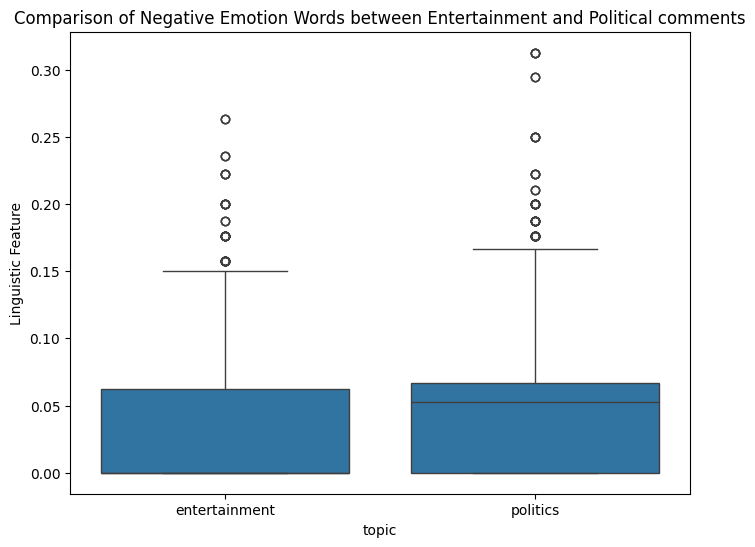

In [24]:
import seaborn as sns # data viz
import matplotlib.pyplot as plt # plotting

# Create a box plot
plt.figure(figsize=(8, 6)) # width and height of figure in inches
sns.boxplot(x='topic', y='NRC_negative', data=filtered_nw_df) # create your boxplot
plt.title('Comparison of Negative Emotion Words between Entertainment and Political comments') # title
plt.ylabel('Linguistic Feature') # label y axis
plt.show()

**This is the result of negative emotion words**

**DO ADJs**

In [25]:
for doc in filtered_nw_df_docs: #go through each document
  print(f'This is a new sentence\n')
  for token in doc: #go through each token in the document
    print(token, token.lemma_, token.pos_) #print token, lemma, and universal dependency pos tag

Streaming output truncated to the last 5000 lines.
accusation accusation NOUN
i I PRON
spent spend VERB
a a DET
lot lot NOUN
of of ADP
time time NOUN
trying try VERB
to to PART
reach reach VERB
an an DET
understanding understanding NOUN
with with ADP
you you PRON
This is a new sentence

no no INTJ
the the DET
full full ADJ
video video NOUN
shows show VERB
that that SCONJ
the the DET
kids kid NOUN
surrounded surround VERB
and and CCONJ
berated berate VERB
the the DET
native native ADJ
elder eld ADJ
man man NOUN
This is a new sentence

i I PRON
ca can AUX
nt not PART
help help VERB
but but CCONJ
notice notice VERB
they they PRON
did do AUX
nt not PART
show show VERB
name name NOUN
name name NOUN
or or CCONJ
the the DET
most most ADV
dramatic dramatic ADJ
transformation transformation NOUN
of of ADP
all all DET
name name NOUN
This is a new sentence

i I PRON
upvoted upvote VERB
this this DET
comment comment NOUN
because because SCONJ
i I PRON
m m VERB
a a DET
dumbass dumbass NOUN
snarkbal

This section performs part-of-speech (POS) tagging and word counting for each comment in the dataset. Using the tokenized spaCy documents stored in topic_clean_df_docs, the code iterates through every text to calculate three key measures: the total number of words, the proportion of nouns, and the proportion of adjectives.

In [26]:
nw_final = [] # word count
adj_final = []
neg_adj_final = []       # proportion of negative adjectives among all tokens
neg_adj_within_adj = []  # proportion of negative adjectives among adjectives

#loop for each document in spacy doc
for doc in filtered_nw_df_docs:
    nw = 0
    adj = 0
    neg_adj = 0

    for token in doc:
        # skip spaces and punctuation
        if token.is_space or token.is_punct:
            continue

        nw += 1
        word = token.text  # already lowercased from cleaned_text

        # count adjectives
        if token.pos_ == "ADJ":
            adj += 1
            # adjective that is also an NRC negative word
            if word in nrc_dict['negative']:
                neg_adj += 1

    nw_final.append(nw)
    adj_final.append(safe_divide(adj, nw))          # ADJ proportion
    neg_adj_final.append(safe_divide(neg_adj, nw))  # negative ADJ / all tokens
    neg_adj_within_adj.append(safe_divide(neg_adj, adj))  # negative ADJ / all ADJs

print(nw_final)
print(adj_final)
print(neg_adj_final)
print(neg_adj_within_adj)

[17, 16, 15, 18, 17, 19, 17, 19, 20, 16, 15, 15, 18, 17, 17, 19, 19, 19, 19, 15, 17, 17, 17, 19, 16, 19, 19, 19, 19, 18, 19, 16, 19, 20, 17, 15, 20, 17, 20, 19, 17, 16, 18, 16, 19, 15, 17, 16, 18, 20, 20, 15, 20, 16, 17, 16, 15, 20, 17, 16, 20, 19, 17, 20, 19, 19, 17, 18, 19, 15, 15, 16, 19, 19, 18, 20, 20, 19, 19, 17, 18, 16, 17, 16, 20, 15, 16, 19, 15, 17, 19, 15, 20, 20, 19, 18, 20, 19, 15, 16, 19, 17, 16, 17, 18, 16, 17, 17, 19, 16, 16, 15, 16, 16, 16, 16, 19, 15, 15, 19, 19, 20, 19, 19, 15, 16, 19, 17, 16, 18, 15, 15, 17, 19, 16, 17, 17, 16, 16, 18, 19, 20, 15, 17, 16, 18, 17, 16, 15, 16, 18, 16, 16, 15, 15, 15, 15, 18, 16, 20, 16, 20, 16, 15, 17, 18, 17, 15, 15, 19, 15, 17, 16, 17, 17, 20, 16, 18, 19, 20, 18, 16, 18, 18, 18, 20, 17, 17, 18, 19, 20, 18, 16, 17, 19, 19, 16, 17, 16, 20, 15, 16, 20, 20, 19, 15, 20, 16, 20, 17, 20, 16, 20, 16, 15, 19, 17, 18, 16, 17, 20, 17, 15, 16, 15, 20, 17, 17, 16, 19, 17, 20, 18, 19, 20, 16, 19, 19, 19, 17, 18, 19, 20, 20, 19, 18, 18, 16, 20, 18,

In [27]:
filtered_nw_df['Adj'] = adj_final
filtered_nw_df['Neg_Adj'] = neg_adj_final
filtered_nw_df['Neg_Adj_Within_Adj'] = neg_adj_within_adj

filtered_nw_df

/tmp/ipython-input-3404023376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nw_df['Adj'] = adj_final
/tmp/ipython-input-3404023376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_nw_df['Neg_Adj'] = neg_adj_final
/tmp/ipython-input-3404023376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,topic,cleaned_text,NW,NRC_negative,Adj,Neg_Adj,Neg_Adj_Within_Adj
91,entertainment,started feeling smug about my short showers bu...,17,0.176471,0.176471,0.117647,0.666667
115,entertainment,what does your statement even mean its a game ...,16,0.062500,0.000000,0.000000,0.000000
170,politics,the possibilities are fascinating in other tim...,15,0.066667,0.133333,0.000000,0.000000
192,entertainment,thank you people always forget that the happie...,18,0.055556,0.055556,0.000000,0.000000
195,politics,i unfortunately can not afford a lawyer luckil...,17,0.058824,0.058824,0.000000,0.000000
...,...,...,...,...,...,...,...
210755,politics,name doesnt get a vote name get the fuck out o...,16,0.125000,0.000000,0.000000,0.000000
210832,entertainment,name and name together for multiple games comp...,17,0.000000,0.117647,0.000000,0.000000
210913,politics,name doesnt get a vote name get the fuck out o...,16,0.125000,0.000000,0.000000,0.000000
211033,politics,name doesnt get a vote name get the fuck out o...,16,0.125000,0.000000,0.000000,0.000000


Employ t-test to examine whether there are differences in the number adjectives across different domains.

In [28]:
from scipy import stats # stats
import numpy as np # Import numpy

# create arrays by separating data from the filtered_nw_df based on condition

entertainment_adj = filtered_nw_df[filtered_nw_df['topic'] == 'entertainment']['Adj']
politics_adj = filtered_nw_df[filtered_nw_df['topic'] == 'politics']['Adj']


# Perform independent samples t-test using the separated data
ttest_adj_result = stats.ttest_ind(entertainment_adj, politics_adj)

# Cohen's d
d_negative = cohens_d(politics_adj, entertainment_adj)
print(f"Cohen's d (entertainment_adj, politics_adj): {d_negative:.3f}")


# Report means and standard deviations

entertainment_adj_mean = np.mean(entertainment_adj)
entertainment_adj_std = np.std(entertainment_adj)
politics_adj_mean = np.mean(politics_adj)
politics_adj_std = np.std(politics_adj)

print("\nT-test results for Adjectives:")
print(f"  T-statistic: {ttest_adj_result.statistic:.6f}") # f = floating point
print(f"  P-value: {ttest_adj_result.pvalue:.6f}")

print("\nDescriptive statistics for Adjectives:")
print(f"  Entertainment texts M: {entertainment_adj_mean:.6f}, Std Dev: {entertainment_adj_std:.3f}")
print(f"  Politics texts M: {politics_adj_mean:.6f}, Std Dev: {politics_adj_std:.3f}")

Cohen's d (entertainment_adj, politics_adj): -0.004

T-test results for Adjectives:
  T-statistic: 0.131317
  P-value: 0.895530

Descriptive statistics for Adjectives:
  Entertainment texts M: 0.074984, Std Dev: 0.060
  Politics texts M: 0.074754, Std Dev: 0.063


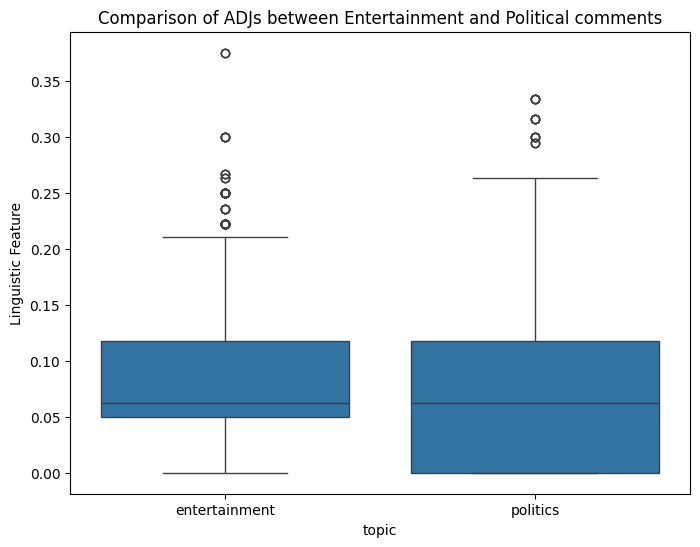

In [29]:
import seaborn as sns # data viz
import matplotlib.pyplot as plt # plotting

# Create a box plot
plt.figure(figsize=(8, 6)) # width and height of figure in inches
sns.boxplot(x='topic', y='Adj', data=filtered_nw_df) # create your boxplot
plt.title('Comparison of ADJs between Entertainment and Political comments') # title
plt.ylabel('Linguistic Feature') # label y axis
plt.show()

No clear difference in adj

**Words that are both adj and negative words**

In [30]:
from scipy import stats # stats
import numpy as np # Import numpy

# create arrays by separating data from the filtered_nw_df based on condition

entertainment_NAdj = filtered_nw_df[filtered_nw_df['topic'] == 'entertainment']['Neg_Adj_Within_Adj']
politics_NAdj = filtered_nw_df[filtered_nw_df['topic'] == 'politics']['Neg_Adj_Within_Adj']

# Check if either series is empty or has too few samples for t-test
if len(entertainment_NAdj) < 2 or len(politics_NAdj) < 2:
    print("Error: Insufficient data for t-test in one or both groups after filtering.")
    print(f"  Entertainment samples: {len(entertainment_NAdj)}")
    print(f"  Politics samples: {len(politics_NAdj)}")
    print("  A t-test requires at least two samples per group. Consider adjusting filtering criteria or data source.")
else:
    # Perform independent samples t-test using the separated data
    ttest_adj_result = stats.ttest_ind(entertainment_NAdj, politics_NAdj)

    # Cohen's d (politics minus entertainment)
    d_negative = cohens_d(politics_NAdj, entertainment_NAdj)
    print(f"Cohen's d (entertainment_NAdj, politics_NAdj): {d_negative:.3f}")


# Report means and standard deviations
    entertainment_Nadj_mean = np.mean(entertainment_NAdj)
    entertainment_Nadj_std = np.std(entertainment_NAdj)
    politics_Nadj_mean = np.mean(politics_NAdj)
    politics_Nadj_std = np.std(politics_NAdj)

    print("\nT-test results for both negative words and Adjectives:")
    print(f"  T-statistic: {ttest_adj_result.statistic:.6f}") # f = floating point
    print(f"  P-value: {ttest_adj_result.pvalue:.6f}")

    print("\nDescriptive statistics for both negative words and Adjectives:")
    print(f"  Entertainment texts M: {entertainment_Nadj_mean:.6f}, Std Dev: {entertainment_Nadj_std:.3f}")
    print(f"  Politics texts M: {politics_Nadj_mean:.6f}, Std Dev: {politics_Nadj_std:.3f}")

Cohen's d (entertainment_NAdj, politics_NAdj): 0.003

T-test results for both negative words and Adjectives:
  T-statistic: -0.112889
  P-value: 0.910123

Descriptive statistics for both negative words and Adjectives:
  Entertainment texts M: 0.123727, Std Dev: 0.283
  Politics texts M: 0.124642, Std Dev: 0.281


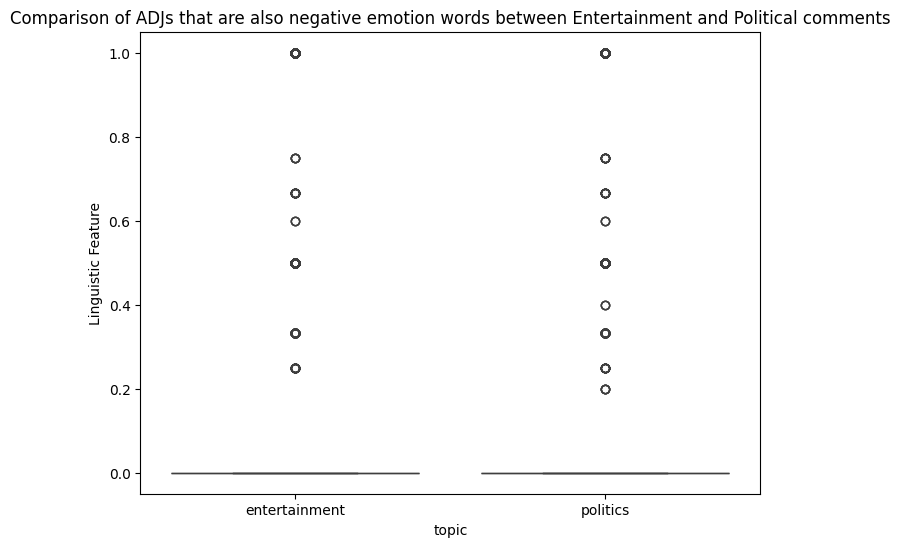

In [31]:
import seaborn as sns # data viz
import matplotlib.pyplot as plt # plotting

# Create a box plot
plt.figure(figsize=(8, 6)) # width and height of figure in inches
sns.boxplot(x='topic', y='Neg_Adj_Within_Adj', data=filtered_nw_df) # create your boxplot
plt.title('Comparison of ADJs that are also negative emotion words between Entertainment and Political comments') # title
plt.ylabel('Linguistic Feature') # label y axis
plt.show()

No significant difference